CHN版本重做

In [1]:
# 检验非排放区
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.basemap import Basemap

china_shp_path = ("H:\\Region\\区划\\省", "省")  # 中国陆地轮廓
nine_shp_path = ("H:\\Region\\全国shp\\最新2021年全国行政区划\\九段线", "九段线")  # 九段线

In [2]:
import os
from copy import deepcopy
china = np.load("seven_parts.npy") >= 0.0

def dxco2_gen():
    inPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_month_npy"
    outPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_month_qkt"
    if not os.path.exists(outPath):
        os.mkdir(outPath)
    for year in range(2010, 2021):
        for month in range(1, 13):
            xco2 = np.load(inPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy")
            xco2[~china] = np.NaN
            bkg = np.nanpercentile(xco2, 50)
            dxco2 = xco2 - bkg
            np.save(outPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy", dxco2)
            print(f"CHN  MappingXCO2_{year}{str(month).zfill(2)}.npy  Succeed.")

In [3]:
dxco2_gen()

CHN  MappingXCO2_201001.npy  Succeed.
CHN  MappingXCO2_201002.npy  Succeed.
CHN  MappingXCO2_201003.npy  Succeed.
CHN  MappingXCO2_201004.npy  Succeed.
CHN  MappingXCO2_201005.npy  Succeed.
CHN  MappingXCO2_201006.npy  Succeed.
CHN  MappingXCO2_201007.npy  Succeed.
CHN  MappingXCO2_201008.npy  Succeed.
CHN  MappingXCO2_201009.npy  Succeed.
CHN  MappingXCO2_201010.npy  Succeed.
CHN  MappingXCO2_201011.npy  Succeed.
CHN  MappingXCO2_201012.npy  Succeed.
CHN  MappingXCO2_201101.npy  Succeed.
CHN  MappingXCO2_201102.npy  Succeed.
CHN  MappingXCO2_201103.npy  Succeed.
CHN  MappingXCO2_201104.npy  Succeed.
CHN  MappingXCO2_201105.npy  Succeed.
CHN  MappingXCO2_201106.npy  Succeed.
CHN  MappingXCO2_201107.npy  Succeed.
CHN  MappingXCO2_201108.npy  Succeed.
CHN  MappingXCO2_201109.npy  Succeed.
CHN  MappingXCO2_201110.npy  Succeed.
CHN  MappingXCO2_201111.npy  Succeed.
CHN  MappingXCO2_201112.npy  Succeed.
CHN  MappingXCO2_201201.npy  Succeed.
CHN  MappingXCO2_201202.npy  Succeed.
CHN  Mapping

H:\preprocessing_code\XCO2\latAndChina\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


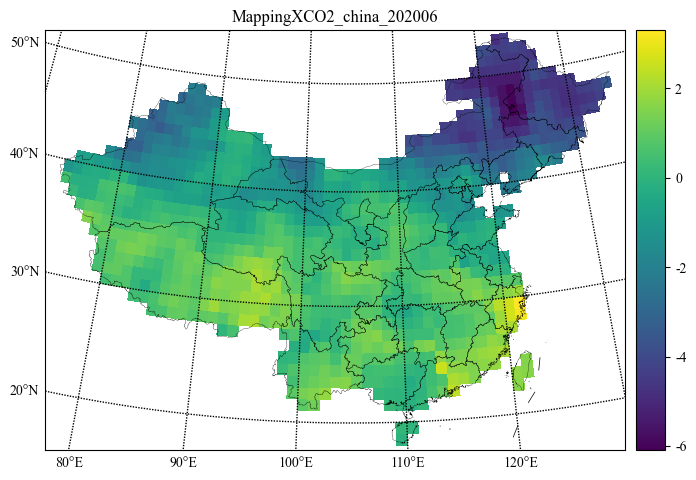

In [8]:
from maplot import map_plot_surface
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_month_qkt\\MappingXCO2_202006.npy"),
                 "viridis", None, None, "MappingXCO2_china_202006", figsize=(8, 8))

In [9]:
# 生成年
def dxco2_year_gen():
    inPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_month_qkt"
    outPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_year_qkt"
    if not os.path.exists(outPath):
        os.mkdir(outPath)
    for year in range(2010, 2021):
        data_months = np.array([np.load(inPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy") for month in range(1, 13)])
        data_year = data_months.mean(axis=0)
        np.save(outPath + "\\" + f"MappingXCO2_{year}", data_year)
        print(f"CHN  {year}  Succeed.")

In [10]:
dxco2_year_gen()

CHN  2010  Succeed.
CHN  2011  Succeed.
CHN  2012  Succeed.
CHN  2013  Succeed.
CHN  2014  Succeed.
CHN  2015  Succeed.
CHN  2016  Succeed.
CHN  2017  Succeed.
CHN  2018  Succeed.
CHN  2019  Succeed.
CHN  2020  Succeed.


H:\preprocessing_code\XCO2\latAndChina\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


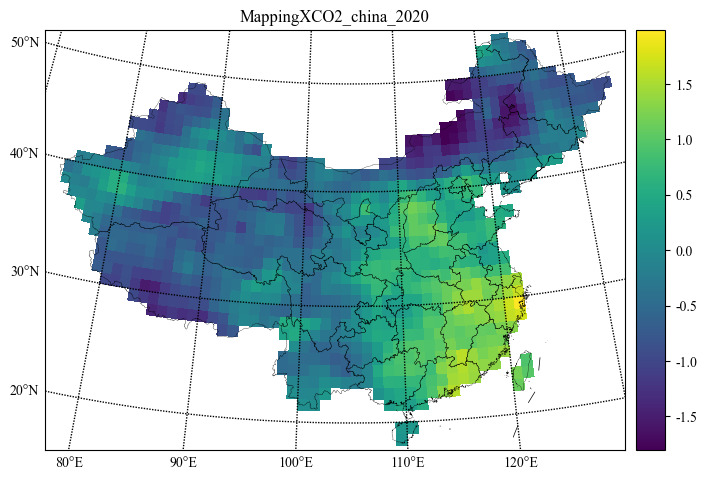

In [11]:
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_china_50percent_year_qkt\\MappingXCO2_2020.npy"),
                 "viridis", None, None, "MappingXCO2_china_2020", figsize=(8, 8))